In [1]:
from tensorflow.python.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

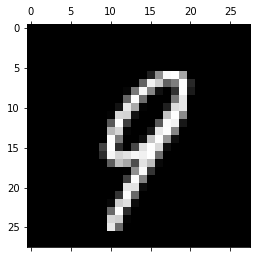

In [2]:
#看一下圖片
train_img = np.reshape(x_train[22, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


In [4]:
#將每張圖片拉平(28*28=784)
#將每張圖片除上色階255，圖上的像素介於0~1

x_train = x_train.reshape(60000, 784)
x_train = x_train/255.
x_test = x_test.reshape(10000, 784)
x_test = x_test/255.

In [5]:
#將label的資料轉成one-hot encoding 

from tensorflow.python.keras.utils import to_categorical


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
#使用Sequential建模
#利用add方法增加模型層數

from tensorflow.python.keras.models import Sequential

model = Sequential()

In [7]:
#增加一層(hidden layer)
#輸入點為784個
#該層之神經元數量為64
#激活函數為relu

from tensorflow.python.keras.layers import Dense


model.add(
    Dense(
        units=64, 
        input_shape=(784,),
        activation='relu'
    )
)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#增加一層(output layer)
#該層之神經元數量為10，因為手寫結果1,2,3,4,5,6,7,8,9,0 (共10個)
#softmax會綜合所有輸入的結果，計算該節點之機率

model.add(
    Dense(
        units=10, 
        activation='softmax'
    )
)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
#透過callbacks方法可以調用執行過程中的結果
#該結果可以轉為TensorBoard視覺化圖表

#batch_size: 一次抓一些資料，小批次
#epochs: 每個小批次要跑幾次，目的是持續找出loss函數的最小值

#看到loss、acc的值，這表示使用訓練資料集的結果
#看到val_loss、val_acc的值，這表示使用測試資料集的結果

#當epoch變多時，若acc變高、loss變低的時候，卻發現 val_acc變低、loss變高，這種情況就類似過擬合現象
#過擬合現象可能導致未知資料的預測性能下降

from tensorflow.python.keras.callbacks import TensorBoard


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
tsb = TensorBoard(log_dir='mnist')
history_adam = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 207us/sample - loss: 0.0100 - acc: 0.9969 - val_loss: 0.1236 - val_acc: 0.9723
Epoch 2/20
48000/48000 [==============================] - 8s 174us/sample - loss: 0.0064 - acc: 0.9984 - val_loss: 0.1317 - val_acc: 0.9707
Epoch 3/20
48000/48000 [==============================] - 8s 163us/sample - loss: 0.0083 - acc: 0.9973 - val_loss: 0.1198 - val_acc: 0.9744
Epoch 4/20
48000/48000 [==============================] - 8s 170us/sample - loss: 0.0051 - acc: 0.9988 - val_loss: 0.1412 - val_acc: 0.9694
Epoch 5/20
48000/48000 [==============================] - 8s 164us/sample - loss: 0.0066 - acc: 0.9985 - val_loss: 0.1357 - val_acc: 0.9717
Epoch 6/20
48000/48000 [==============================] - 8s 168us/sample - loss: 0.0063 - acc: 0.9981 - val_loss: 0.1292 - val_acc: 0.9733
Epoch 7/20
48000/48000 [==============================] - 8s 161us/sample - loss: 0.0063 - acc: 0.9980 - val_